<a href="https://colab.research.google.com/github/RadhavaramHarika/Harika_INFO5731_Spring2020/blob/master/INFO_5709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import warnings
warnings.filterwarnings("ignore")

import os, string, csv, io ,re
from google.colab import drive,files
from textblob import TextBlob,Word
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas as panda
import numpy as nump

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#Using functions to read data from csv file
def readingInputData():
    drive.mount('/content/gdrive')
    filenames = os.listdir('/content/gdrive/My Drive/Colab Notebooks')
    print(filenames)
    os.chdir('/content/gdrive/My Drive/Colab Notebooks')
  
    file_path = "/content/gdrive/My Drive/Colab Notebooks/Womens_Clothing_E-Commerce_Reviews_clean.csv"
    #names = ['ClothingID', 'Age', 'Title', 'ReviewText', 'Rating', 'RecommendedIND','PositiveFeedbackCount','DivisionName','DepartmentName','ClassName']
    filedata = panda.read_csv(file_path)
    return filedata.head(500)


def sentiment_analyzer_scores(ReviewsList,datafr):
  polarity_scores = []
  for each in ReviewsList:
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(ReviewsList)

    if "compound" in score:
      del score["compound"]

    keymax = max(score, key=score.get) 
    polarity_scores.append(score[keymax])
  datafr['Polarity_Score'] = polarity_scores
  return datafr

data = readingInputData()
data.head(20)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Untitled0.ipynb', 'My_first_in_Class_exercise.ipynb', 'My_First_in_class_Assignement_Harika.ipynb', 'Untitled1.ipynb', 'exercise_02_data_collection', 'Copy of In_class_exercise_02 (2).ipynb', 'Untitled2.ipynb', 'textContents.csv', 'Copy of In_class_exercise_02 (1).ipynb', 'Assignment1_denton_housing.csv', 'Harika_INFO5731_Assignment_One.ipynb', 'Untitled', 'Untitled3.ipynb', 'Harika_In_class_exercise_03 (1).ipynb', 'Legal_case.txt', 'stopwords', 'Lower.csv', 'Clean.csv', 'UserReviews.xlsx', 'Copy of In_class_exercise_01.ipynb', 'Harika_Untitled5.ipynb', 'UserReviews.csv', 'Copy of In_class_exercise_02.ipynb', 'Harika_INFO5731_Assignment_Two.ipynb', 'UserReview.csv', 'Harika_In_class_exercise_03.ipynb', 'dissertations_txt', 'Harika_In_class_exercise_05.ipynb', 'Harika_INFO5731_Assignment_Three.ipynb', 'Dissertations_Preprocessing (1).ipynb', 'Copy of Disse

,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
6,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
7,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
8,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
9,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


In [54]:
#Using functions to verify missing values in the dataset
def verifyMissingValuesInData(fileData):
    print(fileData.isnull().sum())
    return

#Calling above function to verify missing values and print results
print("Verifying Missing values in E-commerce dataset: \n")
verifyMissingValuesInData(data)


Verifying Missing values in E-commerce dataset: 

ClothingID               0
Age                      0
Title                    0
ReviewText               0
Rating                   0
RecommendedIND           0
PositiveFeedbackCount    0
DivisionName             0
DepartmentName           0
ClassName                0
dtype: int64


In [56]:
#Using functions to describe the dataset
def descData(fileData):
    print("Dimension of the taken dataset: \n",fileData.shape)
    print("\nData Types of the taken dataset: \n",fileData.dtypes)
    print("\nView of the first ten dataset: \n",fileData.head(10))
    print("\nSummary of the taken dataset: \n",fileData.describe())
    return

def sentiment_analyzer_scores(ReviewsList):
  polarity_scores = []
  analyser = SentimentIntensityAnalyzer()
  for each in ReviewsList:
    score = analyser.polarity_scores(each) 
    polarity_scores.append(score['compound'])
  return polarity_scores

  
#Calling above function to print dataset description
descData(data)


data.head(10)
data.columns

#newData = sentiment_analyzer_scores(list(data['ReviewText']))
#print(newData)


#data['Polarity_score']= newData

#data

Dimension of the taken dataset: 
 (500, 10)

Data Types of the taken dataset: 
 ClothingID                int64
Age                       int64
Title                    object
ReviewText               object
Rating                    int64
RecommendedIND            int64
PositiveFeedbackCount     int64
DivisionName             object
DepartmentName           object
ClassName                object
dtype: object

View of the first ten dataset: 
    ClothingID  Age  ... DepartmentName ClassName
0        1077   60  ...        Dresses   Dresses
1        1049   50  ...        Bottoms     Pants
2         847   47  ...           Tops   Blouses
3        1080   49  ...        Dresses   Dresses
4         858   39  ...           Tops     Knits
5         858   39  ...           Tops     Knits
6        1077   24  ...        Dresses   Dresses
7        1077   34  ...        Dresses   Dresses
8        1077   53  ...        Dresses   Dresses
9        1095   53  ...        Dresses   Dresses

[10 rows x 1

Index(['ClothingID', 'Age', 'Title', 'ReviewText', 'Rating', 'RecommendedIND',
       'PositiveFeedbackCount', 'DivisionName', 'DepartmentName', 'ClassName'],
      dtype='object')

In [58]:
import spacy
from gensim.corpora import Dictionary
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
#!pip install vaderSentiment
#!pip install pyspellchecker
from spellchecker import SpellChecker
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 

nlp = spacy.load("en_core_web_sm")

def removePunctuations(reviewsList):
    Reviews_withNoPunct = []
    transltr_table = str.maketrans('','',string.punctuation)
    for each in reviewsList:
        each_noPunct= re.sub(r"\W"," ",each.strip().translate(transltr_table))
        Reviews_withNoPunct.append(each_noPunct)
    return Reviews_withNoPunct

def removingNumbers(reviewsList):
  Reviews_noNum = []
  for each in reviewsList:
    each = re.sub(r"\d+","",each)
    Reviews_noNum.append(each)
  return Reviews_noNum

def Reviews_tokens(reviewsList):
    reviews_tokens = []
    for each in reviewsList:
        tblob = TextBlob(each)
        reviews_tokens.append([Word(each) for each in tblob.words])
    return reviews_tokens

def removeStopWords(reviewsTokenList):
  stop_words = stopwords.words("english")
  reviews_withnostops = []
  for each_rev in reviewsTokenList:
    reviews_withnostops.append([tokens for tokens in each_rev
                    if tokens not in stop_words])

  return reviews_withnostops

def spellChecking(reviewsTokenList):
  correctReviewTokens = []
  for each_rev in reviewsTokenList:
    spell = SpellChecker()
    correctReviewTokens.append([spell.correction(token) for token in each_rev])
  return correctReviewTokens

def stemming(reviewsTokenList):
  reviews_with_stemming = []
  lancaster = LancasterStemmer()
  for each_rev in reviewsTokenList:
    reviews_with_stemming.append([lancaster.stem(tokens) for tokens in each_rev])
  return reviews_with_stemming

def lemmatized(reviewsTokenList):
  reviews_with_lemmas = []
  for each_rev in reviewsTokenList:
    lemmatizer = WordNetLemmatizer()
    reviews_with_lemmas.append(' '.join([lemmatizer.lemmatize(token) for token in each_rev]))
  return reviews_with_lemmas

def sentiment_analyzer_scores(ReviewsList):
  no_punct = removePunctuations(ReviewsList)
  no_numbers = removingNumbers(no_punct)
  tokens = Reviews_tokens(no_numbers)
  no_stopwords = removeStopWords(tokens)
  stemmed = stemming(no_stopwords)
  lemmas = lemmatized(stemmed)
  polarity_scores = []
  for each in lemmas:
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(each)
    polarity_scores.append(score["compound"])
  return polarity_scores

data['Polarity_score'] = sentiment_analyzer_scores(list(data['ReviewText']))
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName,Polarity_score
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.8074
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.7845
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.5719
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.3612
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
495,1059,37,Great staple!,I am pear-shaped and often have a hard time fi...,5,1,0,General,Bottoms,Pants,0.7964
496,985,65,Perfect fall jacket,This jacket is well-made and smart looking. it...,5,1,0,General,Jackets,Jackets,0.6597
497,1059,36,Must have,Perfect fit. did not lose its shape. thicker m...,5,1,6,General,Bottoms,Pants,0.9313
498,634,35,Lounging dress,This is a great lounging dress or a great beac...,4,1,0,General Petite,Intimate,Lounge,0.3612


In [59]:
data.describe()


,ClothingID,Age,Rating,RecommendedIND,PositiveFeedbackCount,Polarity_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,915.280000,43.646000,4.194000,0.832000,2.470000,0.434220
std,173.136692,12.218317,1.038519,0.374241,4.492824,0.437887
min,4.000000,20.000000,1.000000,0.000000,0.000000,-0.868900
25%,844.000000,35.000000,4.000000,1.000000,0.000000,0.171700
50%,895.000000,41.000000,5.000000,1.000000,1.000000,0.566700
75%,1060.000000,52.000000,5.000000,1.000000,3.000000,0.790600
max,1182.000000,83.000000,5.000000,1.000000,34.000000,0.962800


In [0]:
data.to_csv("Womens_Clothing_E-Commerce_Reviews_Preprocessed.csv")

In [61]:
descData(data)

Dimension of the taken dataset: 
 (500, 11)

Data Types of the taken dataset: 
 ClothingID                 int64
Age                        int64
Title                     object
ReviewText                object
Rating                     int64
RecommendedIND             int64
PositiveFeedbackCount      int64
DivisionName              object
DepartmentName            object
ClassName                 object
Polarity_score           float64
dtype: object

View of the first ten dataset: 
    ClothingID  Age  ... ClassName Polarity_score
0        1077   60  ...   Dresses         0.8074
1        1049   50  ...     Pants         0.7845
2         847   47  ...   Blouses         0.5719
3        1080   49  ...   Dresses         0.3612
4         858   39  ...     Knits         0.0000
5         858   39  ...     Knits         0.2023
6        1077   24  ...   Dresses         0.0000
7        1077   34  ...   Dresses         0.8360
8        1077   53  ...   Dresses         0.5859
9        1095   53 

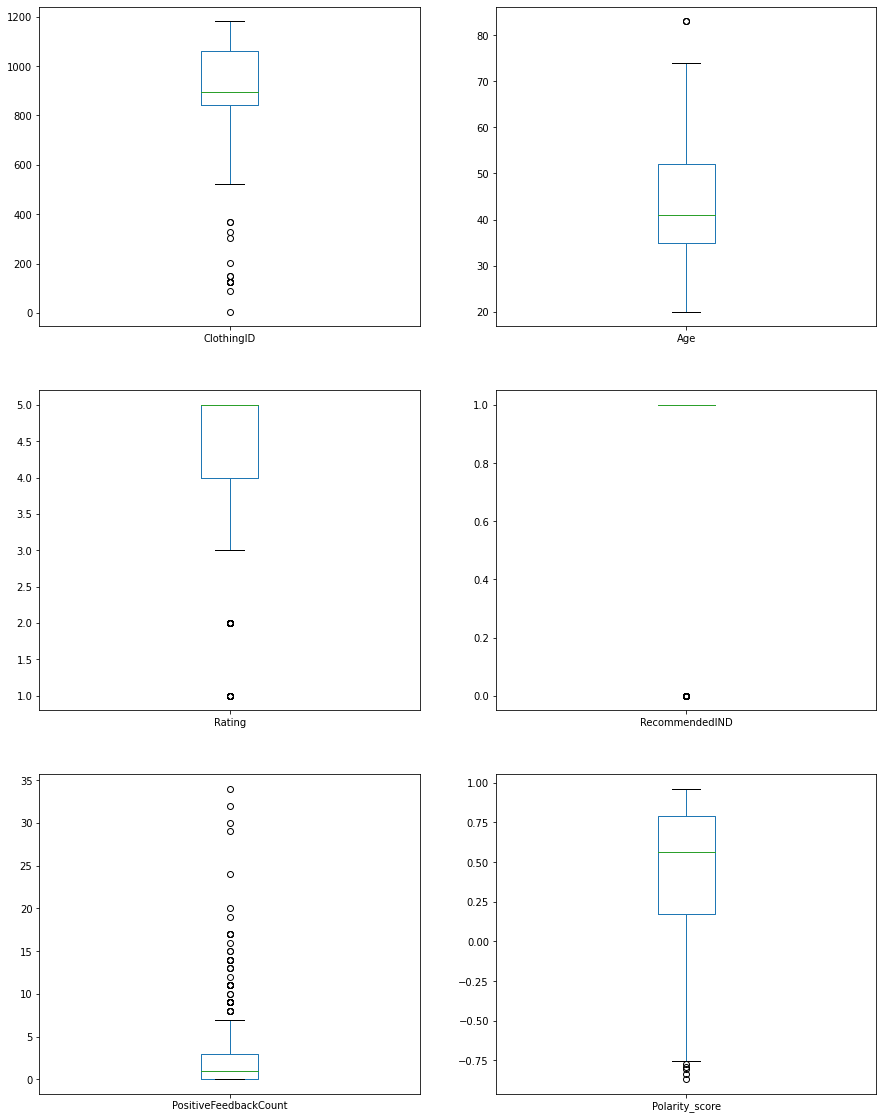

In [62]:
#Plotting univariable box plots for the dataset
data.plot(kind = 'box',subplots = True,layout = (3,2),sharex = False,sharey = False,figsize = (15,20))
plt.show()

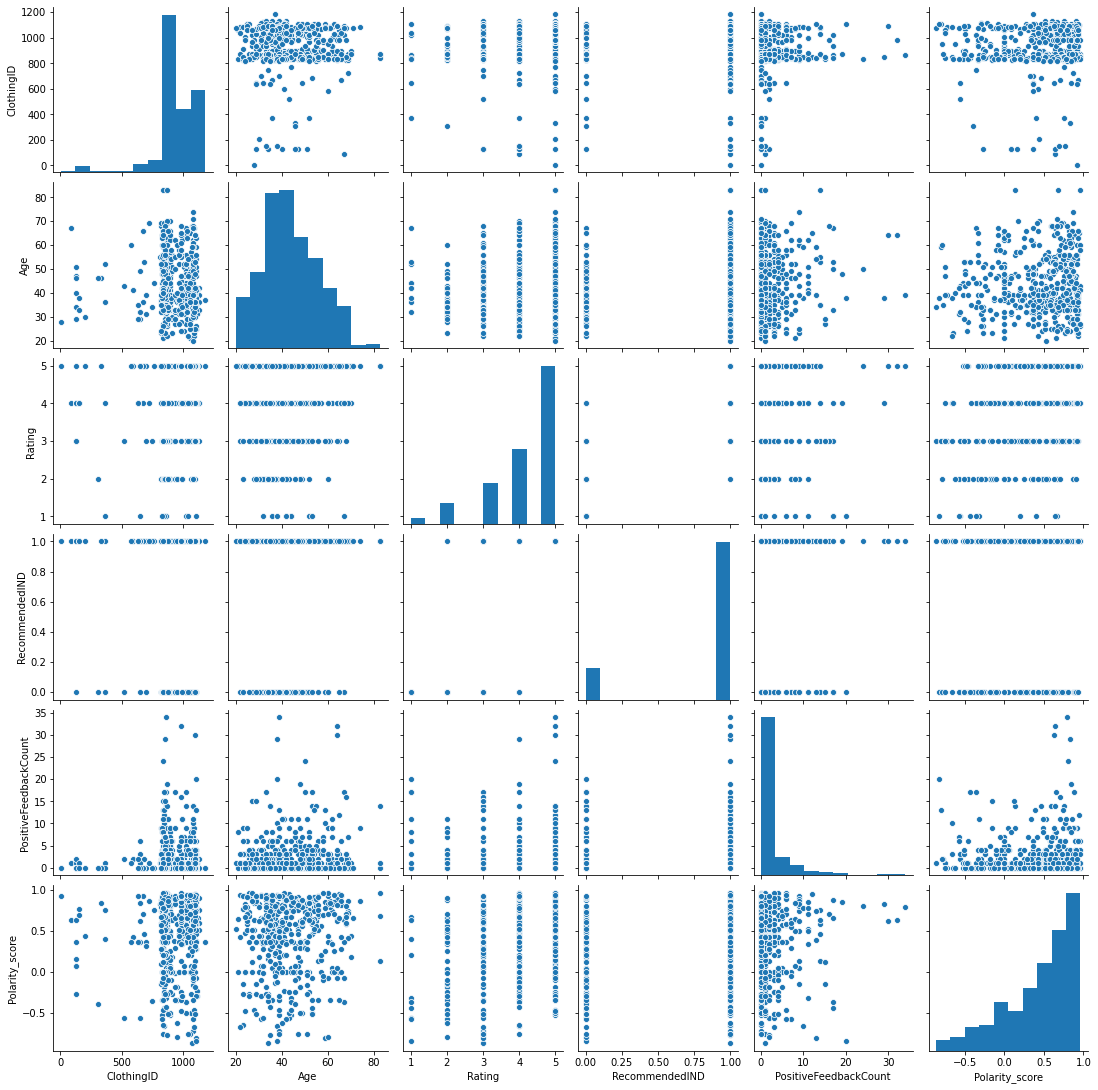

In [63]:
'''Using Pairplot with scatter kind to visualize 
relationship between each pair of variables in dataset'''
sns.pairplot(data, kind = "scatter")

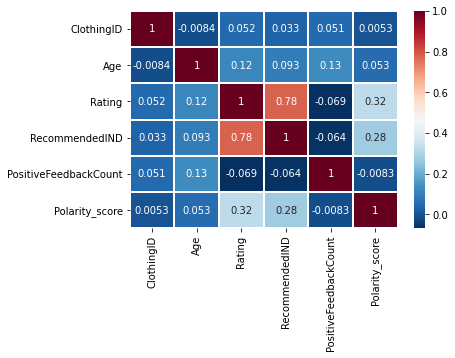

In [65]:
correlation = data.corr(method='pearson')

sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,cmap='RdBu_r',annot=True,linewidth=1.0)